In [48]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [49]:
load_iris().keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [50]:
data = load_iris().data
target = load_iris().target
classes = load_iris().target_names

In [51]:
df = pd.DataFrame(data, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
da = pd.DataFrame(target, columns =['target'])
da['class'] = da['target'].replace({0:'setosa', 1:'versicolor',2:'virginica'})

In [23]:
df_DataFrame = df.join(da)

In [24]:
df_DataFrame.head(10)

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [25]:
df_DataFrame_features = ['sepal length', 'sepal width', 'petal length', 'petal width',]
X = df_DataFrame[df_DataFrame_features]
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
Y = df_DataFrame.target

In [27]:
# now... implement the LDA (bear in mind that you do pass it the y's and it is supervised!)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.40, random_state =20)

In [29]:
X_train

,sepal length,sepal width,petal length,petal width
97,6.2,2.9,4.3,1.3
92,5.8,2.6,4.0,1.2
69,5.6,2.5,3.9,1.1
86,6.7,3.1,4.7,1.5
54,6.5,2.8,4.6,1.5
...,...,...,...,...
22,4.6,3.6,1.0,0.2
75,6.6,3.0,4.4,1.4
137,6.4,3.1,5.5,1.8
15,5.7,4.4,1.5,0.4


In [30]:
#Normalize the dataset
Scall = StandardScaler()
x = Scall.fit_transform(X_train)

In [61]:
# apply the lda transformation
#LinearDiscriminantAnalysis(X_train)

NotFittedError: This LinearDiscriminantAnalysis instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [65]:
lda.fit(X,Y)

LinearDiscriminantAnalysis()

In [70]:
lda.transform(X_train)

array([[-1.42158879, -0.55124463],
       [-1.27227224, -1.21458428],
       [-1.09042788, -1.6265835 ],
       [-2.14258208,  0.08877978],
       [-2.54867836, -0.4722049 ],
       [-1.61615645, -0.47010358],
       [ 6.25140358,  0.43969637],
       [-3.49805433, -1.68495616],
       [-2.47945603, -1.94073927],
       [ 7.34305989, -0.94731921],
       [ 6.93412007, -0.70551938],
       [-2.93397799,  0.02737911],
       [-2.26247349, -1.58725251],
       [-2.29248878, -0.3328603 ],
       [ 8.02097451,  1.14050366],
       [ 8.31444876,  0.64495318],
       [-5.80704331,  2.01019882],
       [ 8.61367201,  0.4032536 ],
       [ 6.75895493, -0.75900276],
       [-1.19376031, -2.6344557 ],
       [-3.939853  ,  0.61402039],
       [-5.50747997, -0.03581399],
       [-5.36071189,  0.64612073],
       [-5.60545633, -0.34073806],
       [-6.51910397,  0.29697639],
       [-6.2920085 ,  0.46717578],
       [-0.89870377, -0.90494003],
       [-5.06601233, -0.02627338],
       [-6.79671631,

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_train)

PCA(n_components=4)

In [73]:
print(pca.components_)

[[ 0.36849353 -0.08398573  0.85227866  0.36163518]
 [-0.64108952 -0.74401419  0.17864519  0.05943913]
 [-0.60873358  0.59023608  0.1004812   0.52054618]
 [ 0.28750682 -0.30167972 -0.4812593   0.77118004]]


In [74]:
print(pca.explained_variance_ratio_)


[0.92651628 0.05508437 0.0132793  0.00512005]


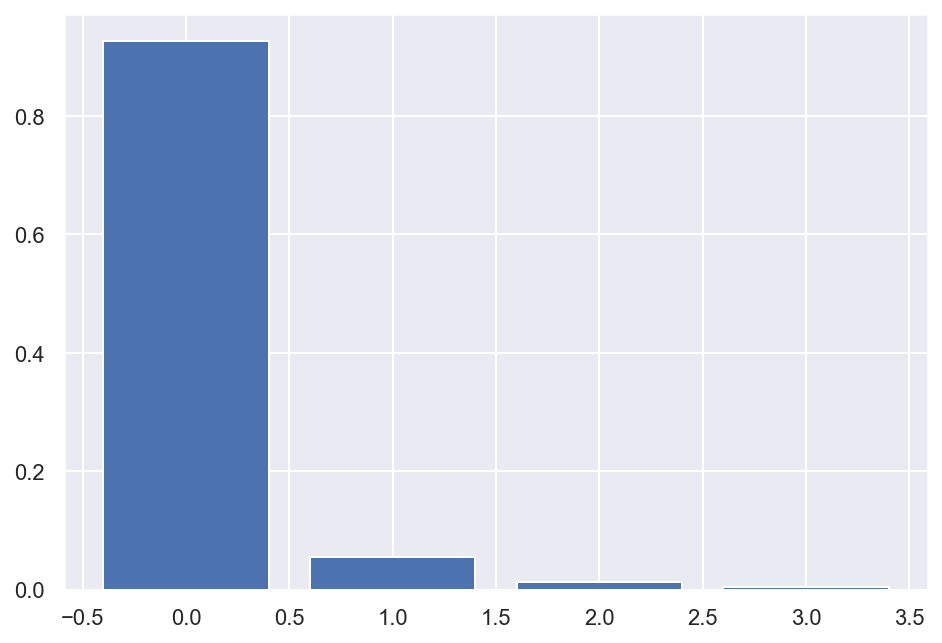

In [75]:
fig =plt.figure()
ax = fig.add_axes([0,0,1 ,1])
width = 0.35
dx = [0, 1, 2, 3]
dy = pca.explained_variance_ratio_
ax.bar(dx, dy, color ='b')
plt.show()

In [76]:
RandomForestClassifier(X_train)

RandomForestClassifier(n_estimators=     sepal length  sepal width  petal length  petal width
97            6.2          2.9           4.3          1.3
92            5.8          2.6           4.0          1.2
69            5.6          2.5           3.9          1.1
86            6.7          3.1           4.7          1.5
54            6.5          2.8           4.6          1.5
..            ...          ...           ...          ...
22            4.6          3.6           1.0          0.2
75            6.6          3.0           4.4          1.4
137           6.4          3.1           5.5          1.8
15            5.7          4.4           1.5          0.4
99            5.7          2.8           4.1          1.3

[90 rows x 4 columns])